## Students
Please fill in your names and S/U-numbers:
* Linda Schmeitz, S1042449
* Enrico Schmitz, s1047521
* Charlotte Cambier van Nooten, s1044122

# Statistical Machine Learning 2020
# Assignment 4
# Deadline: 23 December 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells unless necessary, try to write the answers only in the provided cells. Before you turn this problem in, __make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload the exercises to Brightspace as a single .zip file containing the submitter's S/U-number: 'SML20_as04_&lt;S/U-number&gt;.zip'__, for example 'SML20_as04_S123456.zip'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 4 consists of:
1. Gaussian processes (50 points);
2. EM and doping (50 points);
3. __Gibbs sampling and Metropolis-Hastings (50 points)__;
4. Variational inference for Bayesian linear regression (50 points).

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Gibbs sampling and Metropolis-Hastings (50 points)
Exact inference is often not tractable in real-world probabilistic models. By *exact*, we mean that the likelihood and posterior are available in closed form (as an analytical expression). For example, recall Gaussian processes regression: we have a Gaussian process prior and a Gaussian likelihood that conveniently results in a Gaussian process posterior. It is, however, not the case when we want to use Gaussian processes for classification. We have a Gaussian process prior, yet, the likelihood has to be, for example, sigmoid (logistic) or cumulative normal (probit). Such a prior and likelihood will not give us the Gaussian process posterior anymore. Thus, some other methods would have to be used for this purpose, such as Laplace approximation, Expectation Propagation, or Markov Chain Monte Carlo methods. In particular, for the Gaussian processes classification problem, one could use Gibbs sampling. In this exercise we will avoid some cumbersome derivations related to more complex problems (such as GP classification) and implement Gibbs sampling and Metropolis-Hastings for toy problems to illustrate the intuition behind the algorithms. 
### Gibbs sampler
Consider a two-dimensional Gaussian distribution $\boldsymbol{x}\sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ with parameters 
$$
\boldsymbol{\mu}=
\begin{bmatrix}
1\\
2
\end{bmatrix}
$$
$$
\boldsymbol{\Sigma}=\begin{bmatrix}
1&0.8\\
0.8&2
\end{bmatrix}
$$

1. Write down the relevant conditional densities for sampling from a 2D Gaussian, write down iterations of the Gibbs sampler for sampling from a 2D Gaussian. 

Conditional densities:

$$p(x_1|x_2,\boldsymbol{\mu},\boldsymbol{\Sigma}) =  \mathcal{N}(\boldsymbol{\mu_{1|2}},\boldsymbol{\Sigma_{1|2}})$$

$$\boldsymbol{\mu_{1|2}} = \boldsymbol{\mu_1} + \boldsymbol{\Sigma_{12}} \boldsymbol{\Sigma_{22}}^{-1} (\boldsymbol{x_2}-\boldsymbol{\mu_2})$$

$$\boldsymbol{\Sigma_{1|2}} = \boldsymbol{\Sigma_{11}} -\boldsymbol{\Sigma_{12}} \boldsymbol{\Sigma_{22}}^{-1}\boldsymbol{\Sigma_{21}}  $$

$$p(x_2|x_1,\boldsymbol{\mu},\boldsymbol{\Sigma}) =  \mathcal{N}(\boldsymbol{\mu_{2|1}},\boldsymbol{\Sigma_{2|1}})$$

$$\boldsymbol{\mu_{2|1}}  = \boldsymbol{\mu_2} + \boldsymbol{\Sigma_{21}} \boldsymbol{\Sigma_{11}}^{-1} (\boldsymbol{x_1}-\boldsymbol{\mu_1})$$

$$\boldsymbol{\Sigma_{2|1}} = \boldsymbol{\Sigma_{22}} -\boldsymbol{\Sigma_{21}} \boldsymbol{\Sigma_{11}}^{-1}\boldsymbol{\Sigma_{12}}  $$


Iterations: 

1. Initialize {$x_i: i = 1,2$},
2. For $\tau=1,...,T$:
    - Sample $x_{1}^{(\tau+1)} \sim p(x_1|x_2^{(\tau)},\boldsymbol{\mu},\boldsymbol{\Sigma})$
    - Sample $x_{2}^{(\tau+1)} \sim p(x_2|x_1^{(\tau+1)},\boldsymbol{\mu},\boldsymbol{\Sigma})$


2. Implement Gibbs sampler in the programming language of your choice. Start with an initial guess $[-1.5, 4]^{T}$. Plot Gaussian contours and initial guess (see the figure below, note that $\theta_{1}$ and $\theta_{2}$ correspond to $x_{1}$ and $x_{2}$). Now create a similar plot after 2, 5, and 100 full cycles of Gibbs sampler.
<img src="GibbsGauss.png" alt="GibbsGauss" style="width: 300px;"/>
Create a function that plots the contours, the initial guess, and the generated samples. 

In [ ]:
def gauss_contour(mu, sigma, init_guess, samples=[], title='Initial guess'):
    """
    Function to plot Gaussian contours and initial guess.

    Parameters
    ----------
    mu : (2,) np.ndarray
        The mean.
    sigma : (2,2) np.ndarray
        The covariance.
    init_guess : (2,) np.ndarray
        The array containing the initial guess.
    samples : (T,2) np.ndarray
        The array containing the generated samples.
    title : The title of the plot.

    Returns
    -------
    """
    # YOUR CODE HERE
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    initial_guess = init_guess
    #true
    mu = np.array([1,2])
    sigma = np.array([[1, 0.8],[0.8,2]])
    plot_gaussian_contour(mu, sigma, ax, n_std=2, edgecolor='g', label="True Distribution")
    #initial gues
    ax.scatter(initial_guess[0], initial_guess[1], c='r', label='inititial guess')
    
    if (len(samples)>1):
        #gibbs found
        ax.scatter(samples[1:,0],samples[1:,1], c='b', label='samples', alpha=0.5)
        mu = np.mean(samples,axis=0)
        sigma = np.cov(samples.T)
        plot_gaussian_contour(mu, sigma, ax, n_std=2, edgecolor='r', label="Gibbs")

    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    plt.legend()
    plt.show()



In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_gaussian_contour(mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



Implement the Gibbs sampler.

In [ ]:
def cond_sampler(i, point_x, mu, sigma):
    j = 1-i #j is condition index, i in sample index
    mu = mu[i] + (sigma[i,j]*(sigma[j,j]**-1)*(point_x[j]-mu[j]))
    sigma = sigma[i,i] - sigma[i,j]*(sigma[j,j]**-1)*sigma[j,i]
    new_point = np.copy(point_x)
    new_point[i] = np.random.normal(mu, sigma,1)#np.random.rand()*sigma + mu
    return new_point

def Gibbs(mu, sigma, init_guess, T):
    """
    Function to plot Gaussian contours and initial guess.

    Parameters
    ----------
    mu : (2,) np.ndarray
        The mean.
    sigma : (2,2) np.ndarray
        The covariance.
    init_guess : (2,) np.ndarray
        The array containing the initial guess.
    T : integer
        The number of samples to generate.

    Returns
    -------
    The samples generated.
    """

    point1 = init_guess[0]
    point2 = init_guess[1]
    point = init_guess
    samples = np.empty([T+1, 2]) 
    samples[0] = [init_guess[0], init_guess[1]]

    for i in range(T):
        point = cond_sampler(0, point, mu, sigma)
        point = cond_sampler(1, point, mu, sigma)  
        samples[i+1] = point

    return samples

Run the Gibbs sampler and plot the results.

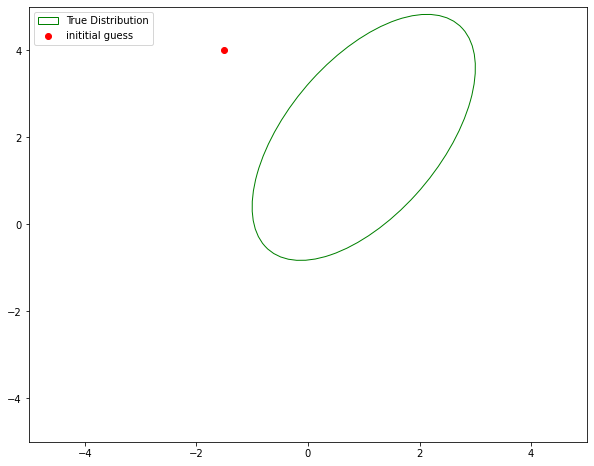

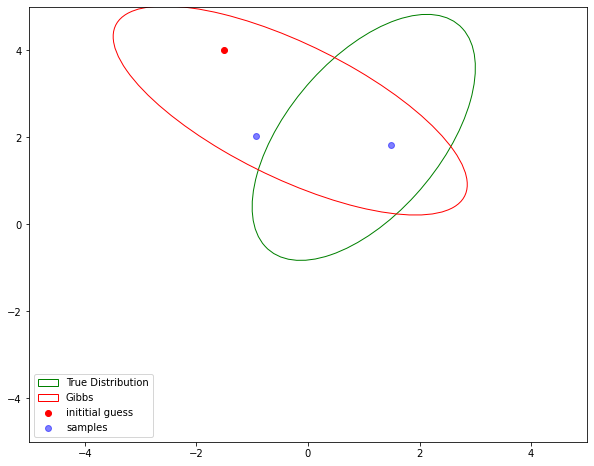

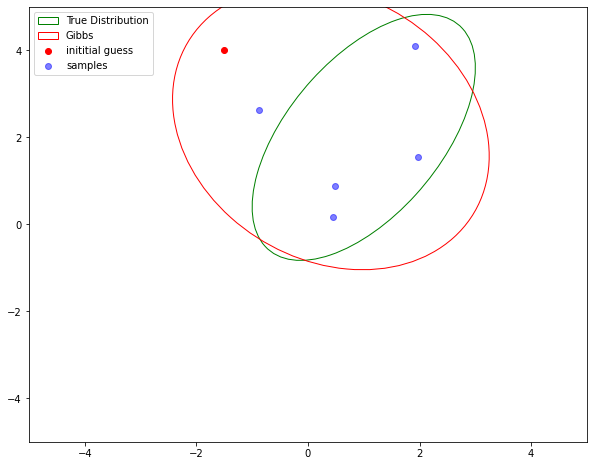

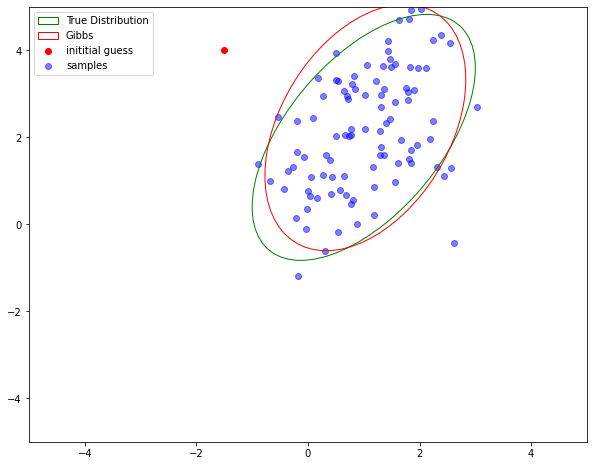

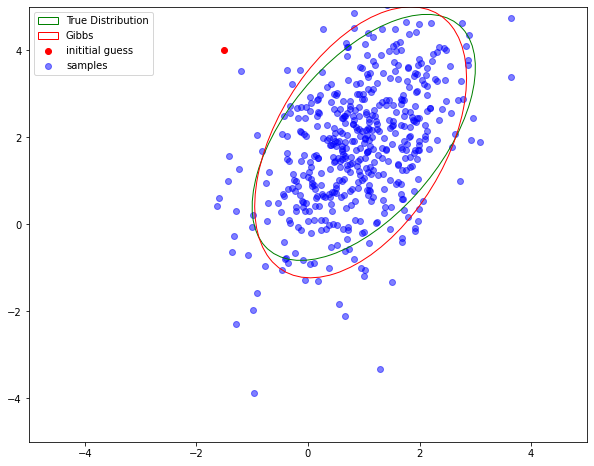

In [ ]:
"""
Define the initial guess, the mean, the covariance, and run the Gibbs sampler.
"""
initial_guess = np.array([-1.5,4])
mu = np.array([1,2])
sigma = np.array([[1, 0.8],[0.8,2]])

gauss_contour(mu, sigma, initial_guess)
gauss_contour(mu, sigma, initial_guess,Gibbs(mu, sigma, initial_guess, 2))
gauss_contour(mu, sigma, initial_guess,Gibbs(mu, sigma, initial_guess, 5))
gauss_contour(mu, sigma, initial_guess,Gibbs(mu, sigma, initial_guess, 100))
gauss_contour(mu, sigma, initial_guess,Gibbs(mu, sigma, initial_guess, 500))

3. Compute the sample mean and sample covariance after 50, 100, 500, and 1000 samples.

In [ ]:
"""
Compute the sample mean and covariance.
"""
initial_guess = np.array([-1.5,4])
mu = np.array([1,2])
sigma = np.array([[1, 0.8],[0.8,2]])

def mu_cov_gibs(mu, sigma, initial_guess, nr_samples):
    samples = Gibbs(mu, sigma, initial_guess, nr_samples)
    mu = np.mean(samples,axis=0)
    cov = np.cov(samples.T)
    print("-------------")
    print('Number of samples:',nr_samples)
    print('mu:', mu)
    print('covariance:', cov)
    print()
    
for nr_samples in [50,100,500,1000]:
    mu_cov_gibs(mu, sigma,initial_guess, nr_samples)

-------------
Number of samples: 50
mu: [1.00178457 2.19230035]
covariance: [[1.12186175 0.75593518]
 [0.75593518 2.49020162]]

-------------
Number of samples: 100
mu: [0.96133847 2.05115365]
covariance: [[0.82125666 0.43081266]
 [0.43081266 2.29499435]]

-------------
Number of samples: 500
mu: [1.05395013 2.1268802 ]
covariance: [[0.91511791 0.70210538]
 [0.70210538 2.3651358 ]]

-------------
Number of samples: 1000
mu: [1.01235638 2.0045203 ]
covariance: [[0.94353254 0.7478297 ]
 [0.7478297  2.57470682]]



Comment on the results.

The higher the number of samples, the closer you are to the true covariance and true mean. 
But it is not able to reach it exactly (with a maximum of 1000 samples).

### Metropolis-Hastings
Here, we will continue working with bivariate Gaussian distribution. However, we will set up the problem differently. Assume now that the correlation parameter $\rho$ is unknown (while the mean and variances remain known):
$$
\boldsymbol{\mu}=
\begin{bmatrix}
0\\
0
\end{bmatrix}\,\,\,\,\,\,\,\,\,\,
\boldsymbol{\Sigma}=\begin{bmatrix}
1&\rho\\
\rho&1
\end{bmatrix}
$$
The likelihood function follows
$$
p(x_{1}^{i}, x_{2}^{i}|\rho)=\prod_{i=1}^{N}\frac{1}{2\pi\sqrt{1-\rho^{2}}}\exp\left(-\frac{1}{2(1-\rho^{2})}(x_{1}^{i})^{2}-2\rho x_{1}^{i}x_{2}^{i}+(x_{2}^{i})^{2}) \right),
$$
where index $i$ represents the $i^{th}$ observation. Further, we want to specify an uninformative prior on our covariance matrix. It is common to take the Jeffreys prior (https://en.wikipedia.org/wiki/Jeffreys_prior). In our case, it will become
$$
p(\rho)=\frac{1}{|\Sigma^{3/2}|}=\frac{1}{\begin{vmatrix} 1&\rho\\
	\rho&1\end{vmatrix}^{3/2}}=1/(1-\rho^{2})^{3/2}.
$$
If you use Bayes's rule for finding the posterior of $p(\rho)$ you will realize that it is not of any known form. So further we will infer $p(\rho|x_{1}^{1:N}, x_{2}^{1:N})$ using the Metropolis-Hastings algorithm.
For this exercise, generate $N=1000$ data points from multivariate normal with the parameters:
$$
\boldsymbol{\mu}=
\begin{bmatrix}
0\\
0
\end{bmatrix}\,\,\,\,\,\,\,\,\,\,
\boldsymbol{\Sigma}=\begin{bmatrix}
1&0.4\\
0.4&1
\end{bmatrix},
$$
so we know the ground thruth $\rho=0.4$. 
1. In this exercise we will implement the Metropolis-Hastings algorithm. Let us first specify the proposal distribution:
$$
\rho^{cand}\sim Uniform(\rho^{k-1}-0.07, \rho^{k-1}+ 0.07), 
$$
where $k$ is the interation of the Metropolis-Hastings algorithm. Comment on this proposal distribution (is it symmetric? does that help?). Write down the acceptance function for the Metropolis-Hastings algorithm using this proposal distribution. Comment on the role of acceptance function in this algorithm.

The proposal distribution is symmetric (and uniform), so when $q(x_1|x_2) = q(x_2|x_1)$ is satisfied that it is symmetric


Acceptance probability: 
$$A(\rho^{k}|\rho^{k-1}) = min \{ 1, \frac{p(\rho^{k}|x_1,x_2)}{p(\rho^{k-1}|x_1,x_2)} \}$$

$$p(\rho^{k}|x_1,x_2) \propto \frac{1}{(1-\rho^{2})^{3/2}} \prod_{i=1}^{N}\frac{1}{2\pi\sqrt{1-\rho^{2}}}\exp\left(-\frac{1}{2(1-\rho^{2})}(x_{1}^{i})^{2}-2\rho x_{1}^{i}x_{2}^{i}+(x_{2}^{i})^{2}) \right)$$
$$\propto p(\rho) p(x_{1}^{i}, x_{2}^{i}|\rho) $$

$$log(p(x_{1}^{i}, x_{2}^{i}|\rho))$$
$$= (-\frac{1}{2} log(1-\rho^{2}) -log(2\pi))N \sum^{N}_{i=1} ((-\frac{1}{2(1-\rho^{2})}(x_{1}^{i})^{2}-2\rho x_{1}^{i}x_{2}^{i}+(x_{2}^{i})^{2}))  $$
$$= (-\frac{1}{2} log(1-\rho^{2}) -log(2\pi))N -\sum^{N}_{i=1} ((\frac{1}{2(1-\rho^{2})}(x_{1}^{i})^{2}-2\rho x_{1}^{i}x_{2}^{i}+(x_{2}^{i})^{2}))  $$

Role of the acceptance function in the algorithm is to ensure that the condition of the detailed balance is satisfied.

2. Implement the Metropolis-Hastings algorithm for this problem and the proposal function defined above.

    **Note:** We added the functions `joint_logprobability` and `acceptance_function` to help you with the implementation, but their use is optional.

In [ ]:
def joint_logprobability(X, p):
    """
    Calulates log of posterior probability.

    Parameters
    ----------
    X : (N, 2) np.ndarray
        Data points.
    p : float
        Correlation parameter.

    Returns
    -------
    probability of given X and p
    """

    p_rho = np.log(1.-p**2)*(-3./2)
    log_likelihood = ((-1./2)*np.log(1.-p**2) - log(2*np.pi))*N - sum(1./(2.*(1.-p**2))*(X[0]**2-2.*rho*X[0]*X[1]+X[1]**2))

    return p_rho - log_likelihood

In [ ]:
def acceptance_function(X, p_candidate, p_current):
    """
    Computes acceptance probability of a candidate.

    Parameters
    ----------
    X : (N, 2) np.ndarray
        Data points.
    p_candidate : float
        Candidate sample.
    p_current : float
        Current sample.

    Returns
    -------
    Value of acceptance function for given p_candidate and p_current.
    """
    acceptance_candidate = joint_logprobability(X, p_candidate)
    acceptance_current = joint_logprobability(X, p_current)

    accept_function = acceptance_candidate - acceptance_current #due to log substract
	
    acceptance_value = min([0,accept_function]) #(exp(0)=1)
    acceptance_value = np.exp(acceptance_value)
    
    return acceptance_value

In [ ]:
def metropolis_hastings(X, half_interval_len, T, uni = 0.07):
    """
    Metropolis-Hastings sampling implementation and plotting of the results.

    Parameters
    ----------
    X : (N, 2) np.ndarray
        Data points.
    half_interval_len : float
        Half interval length for the proposal uniform distribution centered around the current state.
    T : integer
        Number of iterations.

    Returns
    -------
    Accepted samples.
    """
    p = []
    curr = 0 #rho**0 = 0
    accepted_n = 0
    for i in range(T):
        cand = uniform.rvs(curr-uni,2*uni)
        accept = acceptance_function(X,cand, curr)
        if uniform.rvs(0,1)<accept:
            curr = cand
            accepted_n=accepted_n+1
        if i >= half_interval_len:
            p.append(curr)
    Acceptance_r = accepted_n/(T)
    p = np.array(p)
    Mean = p.mean()
    Std = p.std()
    summary = [Acceptance_r,Mean,Std]
    return p, summary

Run Metropolis-Hastings for 10000 iterations. You can use the initial value of $\rho^{0}=0$. After sampling $\rho$ 10000 times report acceptance rate, the mean, and the standard deviation of the samples. Plot the trace plot for $\rho$ (i.e., value $\rho^{k}$ at each iteration of the algorithm). Plot the histogram of the posterior distribution of $\rho$ based on the samples in the chain.

...Summary..., uniform(p^(k-1)-0.07, p^(k-1)+0.07)
Acceptance ratio is 0.5935
Mean is 6.35662819443474e-05
Std is 0.032147284372141594


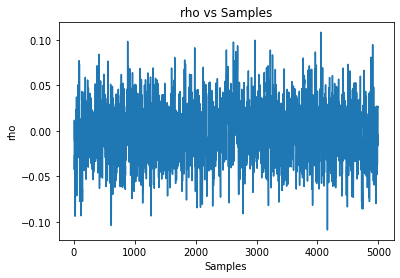

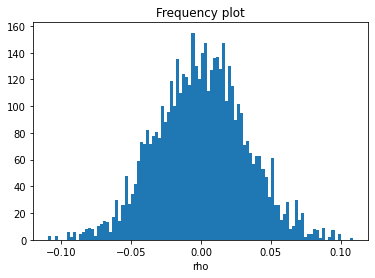

In [ ]:
"""
Run Metropolis-Hastings and report the acceptance rate, the mean and the standard deviation.
Plot the trace plot and the histogram.
"""
T=10000
X=multivariate_normal([0,0],[[1, 0.4],[0.4, 1]],T)

half_interval_len = int(T/2)

p , summary = metropolis_hastings(X, half_interval_len, T)
def MH_Summ(uni, summary, p , half_interval_len):
    print("...Summary..., uniform(p^(k-1)-{0}, p^(k-1)+{0})".format(uni))
    print("Acceptance ratio is "+str(summary[0]))
    print("Mean is "+str(summary[1]))
    print("Std is "+str(summary[2]))

    plt.plot(list(range(half_interval_len)),p)
    plt.title("rho vs Samples")
    plt.ylabel("rho")
    plt.xlabel("Samples")
    plt.show()

    plt.hist(p,100)
    plt.title("Frequency plot")
    plt.xlabel("rho")
    plt.show()
MH_Summ(0.07, summary, p , half_interval_len)

3. Try changing the proposal distribution to 
$$
\rho^{cand}\sim Uniform(\rho^{k-1}-0.01, \rho^{k-1}+ 0.01), 
$$
and 
$$
\rho^{cand}\sim Uniform(\rho^{k-1}-0.3, \rho^{k-1}+ 0.3).
$$

...Summary..., uniform(p^(k-1)-0.01, p^(k-1)+0.01)
Acceptance ratio is 0.9379
Mean is -0.001079611153158624
Std is 0.03252067050562425


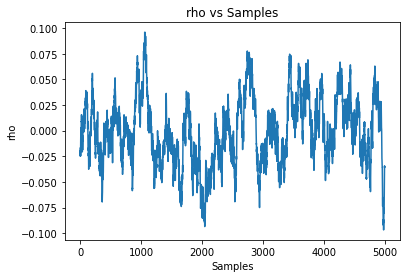

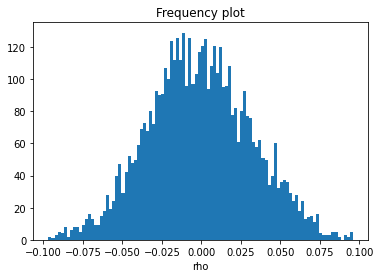

...Summary..., uniform(p^(k-1)-0.3, p^(k-1)+0.3)
Acceptance ratio is 0.1698
Mean is 0.0014233999440056483
Std is 0.03205194319317507


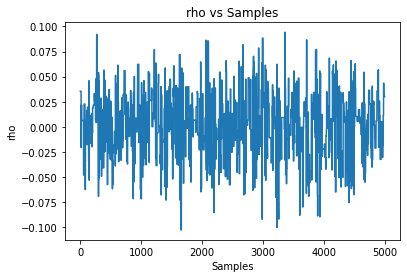

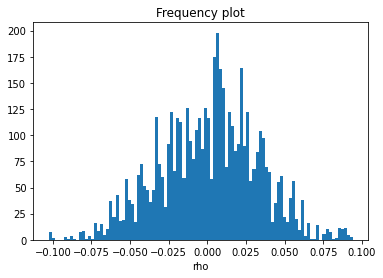

In [ ]:
"""
Run Metropolis-Hastings with the new proposal distributions.
Once again, report the acceptance rate, the mean and the standard deviation. Plot the trace plot and the histogram.
"""

uni = 0.01
p , summary = metropolis_hastings(X, half_interval_len, T, uni)
MH_Summ(uni, summary, p , half_interval_len)

uni=0.3
p , summary = metropolis_hastings(X, half_interval_len, T, uni)
MH_Summ(uni, summary, p , half_interval_len)

Comment on how it changes your results.

When reducing the 'uni' variable the steps are smaller, making a line in the 'rho vs samples' plot visible,
while when 'uni' is set to a larger value the line looks a lot more like noise.